# LAB SESSION 1 - DECISION TREES

## Utils

In [3]:
#conda install -c conda-forge scikit-learn, pandas 

In [4]:
#conda install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Ex 1: introduction to classification trees

We work with the palmerpenguins dataset (see the dataset document https://allisonhorst.github.io/palmerpenguins/).


**Question 0. First of all,**
 - **load the data and look at them (display the dimension and some descriptive statistics)**
 - **visualize the data.**
 - **select the variables that we will use in the exercise. Create a variable `target` with the the names of the target variable `species` and create also the array `features` which contains the names of the two predictors: `bill_length_mm`, `bill_depth_mm`.**
 - **split the dataset into a training and testing dataset (use the value 1023 for `random_state` and the porportion 25% for the test set).** 

In [5]:
# (1) 
penguins=pd.read_csv("penguins.csv")
print(penguins.shape)
penguins.head()

(333, 8)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181,3750,male,2007
1,Adelie,Torgersen,39.5,17.4,186,3800,female,2007
2,Adelie,Torgersen,40.3,18.0,195,3250,female,2007
3,Adelie,Torgersen,36.7,19.3,193,3450,female,2007
4,Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [6]:
# (2) 
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [7]:
# Create a variable `target` with the the names of the target variable `species` 
target=["species"]
#print(target)
#array `features` which contains the names of the two predictors: `bill_length_mm`, `bill_depth_mm`
features=["bill_length_mm","bill_depth_mm"]
print(features)

['bill_length_mm', 'bill_depth_mm']


In [8]:
# split the dataset into a training and testing dataset (use the value 1023 for `random_state` and the porportion 25% for the test set).
x_train,x_test,y_train,y_test=train_test_split(penguins[features],penguins[target],test_size=0.25,random_state=1023)


**Question 1. Fit a classification tree named `tree_clf` to explain `species` by using `bill_length_mm`, `bill_depth_mm`. Use `DecisionTreeClassifier` from `sklearn.tree`. Have a look at the documentation ([here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)). Plot the tree and give its text representation.**

**Indication: your tree is build by using the train set and the Gini criterion. The tree has a maximum depth of 2 and you use the value 1023 for `random_state`.**

In [9]:
#Fit a classification tree named `tree_clf` to explain `species` by using `bill_length_mm`, `bill_depth_mm`
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(random_state=1023,max_depth=2)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=1023)

In [10]:
#Plot the tree and give its text representation
from sklearn import tree 
text_representation=tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 42.55
|   |--- feature_1 <= 14.85
|   |   |--- class: Gentoo
|   |--- feature_1 >  14.85
|   |   |--- class: Adelie
|--- feature_0 >  42.55
|   |--- feature_1 <= 16.35
|   |   |--- class: Gentoo
|   |--- feature_1 >  16.35
|   |   |--- class: Chinstrap



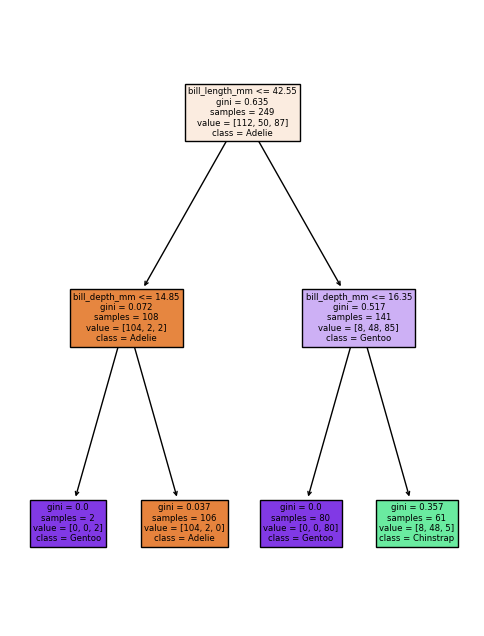

In [11]:
from sklearn.tree import plot_tree
fig=plt.figure(figsize=(6,8)) 
tree_plot=tree.plot_tree(clf,feature_names=features,class_names =clf.classes_,filled=True)

**Question 1bis. Why do we need to choose a value for `random_state`? (use the documentation).**
to ensure randomness ence ensuring reproducibility of results

Answer:

**Question 2. Based on the plot of the tree, write the prediction $f_n(\mathbf x)$ associated to the tree for a new observation $\mathbf x \in \mathbb R^2$.** 

*Indications:* 
- *bill_length_mm is consider as the first feature and so is denoted by $X_1$ while bill_depth_mm is the second feature and is then denoetd by $X_2$.*
- *The modalities of `Species`will be coded as integer: Adelia =0, Chinstrap=1 and Gentoo=2.*

Answer:



**Question 3. Consider a penguin with a bill measuring 45mm (length) and 18mm (depth). By looking at the tree plot, give the probability that this penguin belongs to the Adelie familly, $\mathbf P(Species =Adelie \, \vert \, x_1 = 45, x_2=18)$ ? Check your result by using the methods `predict_proba()`,see ([here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).**

Answer:8/61=0.1311



In [19]:
##TODO
x_predict=pd.DataFrame({'bill_length_mm': [45], 'bill_depth_mm': [18]})
print(x_predict)
class_probabilities=clf.predict_proba(x_predict, check_input=True)
print(class_probabilities)

   bill_length_mm  bill_depth_mm
0              45             18
[[0.13114754 0.78688525 0.08196721]]


**Question 4. Plot the data and the partition associated to the tree. Does the partition agree with the treedisplayed at the previous question ?**

In [ ]:
##------- Complete the command below by filling in the gaps '...'.-------##


range_features = {
    feature_name: (data[feature_name].min() - 1, data[feature_name].max() + 1)
    for feature_name in data.columns
}


import numpy as np

# A function to plot the partition associated to a decision tree model
def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="Pastel2")

    return ax

# Define the colors used
palette = ["tab:orange", "tab:cyan", "tab:purple"]

ax = sns.scatterplot(data=...., x=....., y=......,hue=......, palette=palette)# Define the grid : the data space 
plot_decision_function(fitted_classifier=...., ax=....) # display the tree partition
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # graphical options
plt.title("Penguins dataset")# graphical options


Answer:

**Question 5: Look at the tree structure by using the attribute `tree_`. See the documentations ([here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).Give the number of nodes, the impurity of each node, the node inodes, the id of the nodes, features and threshold used to split, the number of samples in each node.**





In [20]:
##TODO
print("Listof split variables:",clf.tree_.feature,"\n")
print("Number of nodes:",clf.tree_.node_count,"\n")
print("IDofthe left child nodes:",clf.tree_.children_left,"\n")# (-1ifitisleaf node)
print("IDofthe right child nodes:",clf.tree_.children_right,"\n") # (-1ifitisleaf node)
print("Impurity in the nodes:",clf.tree_.impurity,"\n")
print("Treshold for each split:",clf.tree_.threshold,"\n")

Listof split variables: [ 0  1 -2 -2  1 -2 -2] 

Number of nodes: 7 

IDofthe left child nodes: [ 1  2 -1 -1  5 -1 -1] 

IDofthe right child nodes: [ 4  3 -1 -1  6 -1 -1] 

Impurity in the nodes: [0.63528008 0.07201646 0.         0.03702385 0.517479   0.
 0.35689331] 

Treshold for each split: [42.54999924 14.8499999  -2.         -2.         16.34999943 -2.
 -2.        ] 



**Question 6. Predict the class of each observation of the test sample by using the tree and display the confusion matrix. Explain it. How many observations are misclassified? Give the error rate (displayed only twe decimals).**

In [ ]:
##TODO

**Question 7. Fit a second tree with the gini criterion, a maximum depth of 5 and `random_state`=1023. Draw the tree and compute the accuracy of this second tree on the test set. Compare the accuracy between the two trees. What tree do you choose? Justify.**

In [ ]:
##TODO


**BONUS. As we don't know what what is the optiml size of the tree, we will apply the cost-complexity pruning method that consists in the following steps.**
   - **Step 1: Fit the maximum tree (don't choose any value for max_depth and use random_state=1023)**
   - **Step 2: Get a sequence of values for the parameter (ccp_alpha) using the method `cost_complexity_pruning_path()` and built a tree for each value of the complexity parameter. Indication: the parameter `ccp_alpha`enables to make a trade-off between accuracy and complexity.**
   - **Step 3: Compute the accuracy on both the train set and test set for each tree.**
   - **Step 4: Draw the following plots :**
      **Plot 1 = number of nodes of a tree vs ccp_alpha,**
      **Plot 2 = tree depth vs ccp_alpha**
      **Plot 3 and 4 = accuracy vs ccp_alpha for training and testing sets.**
      
**Run the code below and commend the graphics. What tree do you select ? Justifiy and plot it.**

In [ ]:
## Step 1
from sklearn.tree import DecisionTreeClassifier, plot_tree
max_tree_clf = DecisionTreeClassifier(random_state=2310)

In [ ]:
## Step 2
path = max_tree_clf.cost_complexity_pruning_path(data_train, target_train)
ccp_alphas= path.ccp_alphas; #print('ccp-alphas values:',ccp_alphas)

tree_clfs = []
for alpha in ccp_alphas:
    tree_clf = DecisionTreeClassifier(random_state=2310, ccp_alpha=alpha)
    tree_clf.fit(data_train, target_train)
    tree_clfs.append(tree_clf)


tree_clfs = tree_clfs[:-1] #a list including all the decision trees for all alpha values
ccp_alphas = ccp_alphas[:-1] #a list including all alpha values


node_counts = [tree_clf.tree_.node_count for tree_clf in tree_clfs]#a vector with the number of nodes for all decision trees 
depth = [tree_clf.tree_.max_depth for tree_clf in tree_clfs]#a vector with the depth for all decision trees 

In [ ]:
## Step 3
train_acc = [tree_clf.score(data_train, target_train) for tree_clf in tree_clfs]
test_acc = [tree_clf.score(data_test, target_test) for tree_clf in tree_clfs]

In [ ]:
## Step 4

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("number of nodes")
ax.set_title("Number of nodes vs alpha")
fig.tight_layout()

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("depth of tree")
ax.set_title("Depth vs alpha")
fig.tight_layout()

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ccp_alphas, train_acc, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_acc, marker='o', label="test",   drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.legend()
plt.show()

Answer:

In [ ]:
##TODO

## Ex 2: introduction to regression trees

We work with the iris dataset (see the dataset documentation https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).


**Question 0. First of all,**
 - **load the data and look at them (dimension, attributes, statistic summary).** 
 - **select the variables that we will use in the exercise (predictor = `sepal length`, target = `petal width`)**
 - **plot the data (x-axis = `sepal length`, y-axis = `petal width`).**
 - **split the dataset into a training and testing dataset (use `random_state`=2310 and `test_size`=0.3).**

In [ ]:
## TODO


**Question 1. Fit a regression tree + a linear model to explain `petal width` by using `sepal length`. Use `DecisionTreeRegressor` from `sklearn.tree`. Have a look at the documentation ([here tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) and [here linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)). Plot the tree and give its text representation.**

**Indication: your tree is build by using the train set and an appropriate impurity criterion. The tree has a maximum depth of 3 and you use the value 2310 for `random_state`. Use the default parameter values for the linear model.**

In [ ]:
##TODO

**Question 2. Based on the plot of the tree, what it the prediction of the `petal width` for the new observation with `sepal length`= 2,4 ? How is computed the prediction on each leaf of the tree ?**

Answer:

**Question 3. Compute the predictions of both models on the test set.** 

In [ ]:
##TODO



**Question 4. Display the data using a scatter plot and superimpose as two lines the predictions of both the models.** 

In [ ]:
##TODO


**Question 5. Compute the error for both the models. Interpret the results.**

In [ ]:
##TODO